<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2023<br>
<font color=3C99D size=5>
    Practical Assignment 5 - Machine Learning <br>
<font color=696880 size=4>
    Ali Sharifi


____

# Personal Data

In [ ]:
# Set your student number
student_number = '400105069'
Name = 'محمدشایان'
Last_Name = 'شعبانی'

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
rng = np.random.default_rng(42)

# Question 1: Polynomial Regresrion Implementation (15 points)

<font size=4>
Author: Ali Sharifi
<br/>
<font color=red>
Please run all the cells.
</font>
</font>
<br/>
</div>

In the following section, you will implement a class that performs Polynomial Regression. Follow instructions in the methods' body. Note that your input and output shapes must be the same as instructions.
$$\hat{y} = a_nx^n + \dots + a_1x + a_0$$

In [47]:
class PolynomialRegression:
    """
        The class of polynomial regression.
    """
    def __init__(self, degree):
        """
          initialize parameters you need.
        """
        # Write your code here
        self.degree = degree
        self.coefficients = None
        
    def PolynomialFeature(self, X, degree):
        """
          X of the shape (m, 1)
          returns an array A=(a_{ij}) of the shape (m, degree) such that a_{ij} = X_i^j
        """
        # Write your code here
        size = X.shape[0]
        A = np.ones((size, degree + 1))
        for j in range(0, degree + 1):
            A[:, j] = X[:, 0] ** j
        return A

    def LinearRegression(self, X, Y):
        """
          X of the shape (m, n)
          y of the shape (m,)
          returns coefficients of linear regression of the shape (n+1,) (extra coefficient for bias term)
        """
        # Write your code here
        theta = np.linalg.lstsq(X, Y, rcond=None)[0]
        return theta
        
    def fit(self, X, Y):
        """
          X of the shape (m, n)
          y of the shape (m,)
          returns None
        """
        # Write your code here
        X_polynomial = self.PolynomialFeature(X, self.degree)
        self.coefficients = self.LinearRegression(X_polynomial, Y)
        
    def predict(self, X):
        """
          X of the shape (m, 1)
          returns an array of the shape (m,)
        """
        # Write your code here
        X_polynomial = self.PolynomialFeature(X, self.degree)
        predictions = X_polynomial.dot(self.coefficients)
        return predictions
        

# Question 2: Regressing a Sine Function in Polyomial Functions (10 points)

Consider the underlying function $f^*(X) = \sin(X)$. Generate 15 datasets with 5, 10, 15, 25, and 50 i.i.d samples from the following distribution: (three datasets with each size)
$$
X \sim \text{uniform}(0, 2\pi) \\
Y | X \sim \text{N}(f^*(X), \sigma^2) \\
\text{where } \sigma = .5
$$
Assume we want to train models of degrees 1, 3, 8, 12, and 15 on these datasets. Generate a $5\times 5$ grid of plots. Assume that rows correspond to the dataset size and columns correspond to the degree of model. In each plot, plot the result hypothesis functions from training the corresponding model on the corresponding datasets. In addition plot the underlying function.

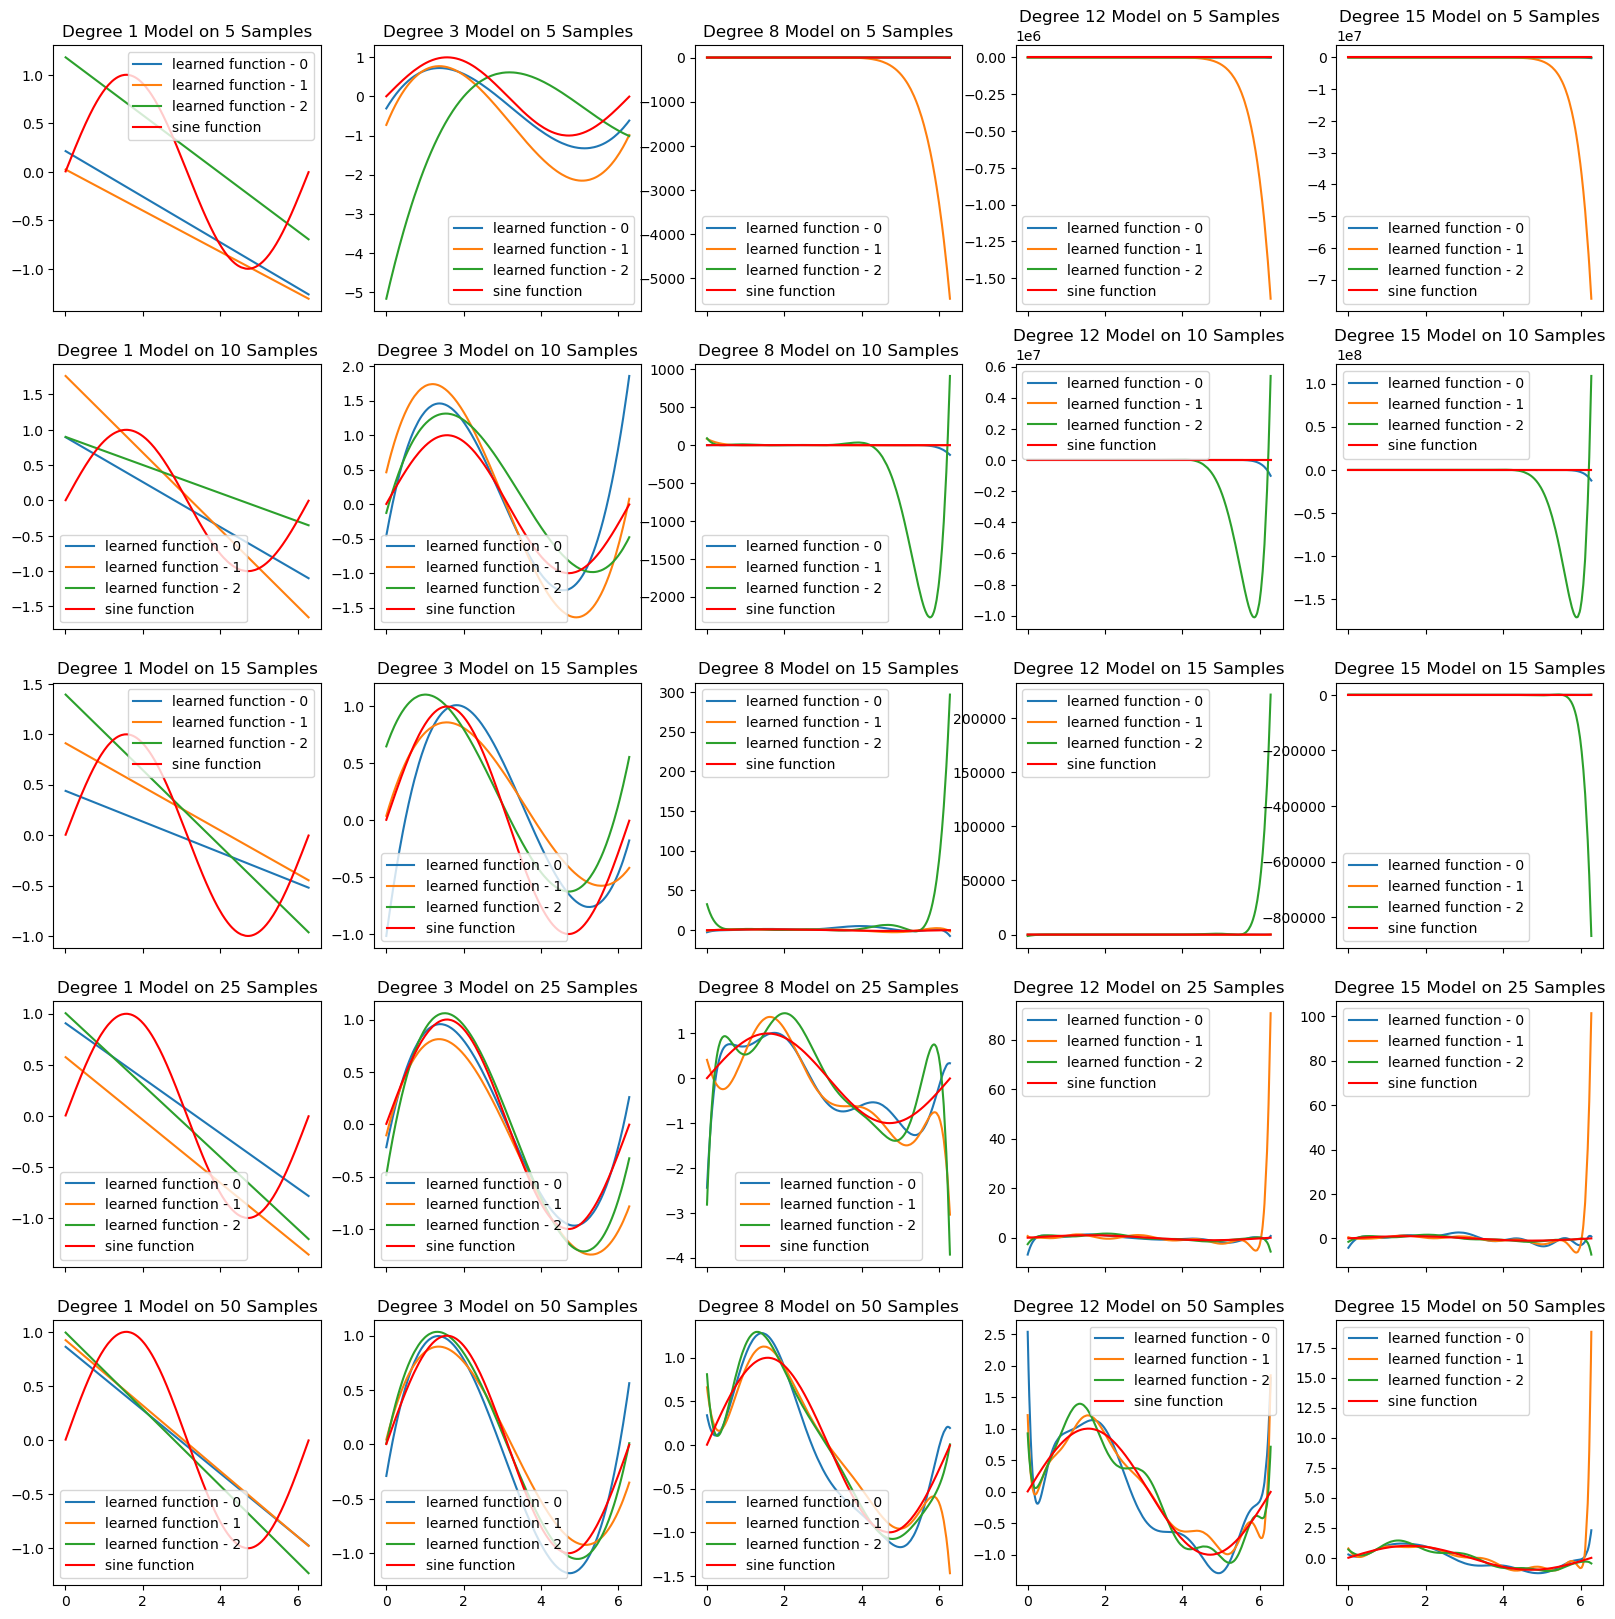

In [36]:
def generate_dataset(size, sigma=0.5):
    X = np.random.uniform(0, 2 * np.pi, size)
    Y = np.random.normal(np.sin(X), sigma)
    return X.reshape(-1, 1), Y

degrees = [1, 3, 8, 12, 15]
dataset_sizes = [5, 10, 15, 25, 50]



fig, ax = plt.subplots(5, 5, sharex=True, gridspec_kw=dict(hspace=.2, wspace=.2), figsize=(20, 20))
datasets = []

for i , size in enumerate(dataset_sizes):
    temp = []
    for j in range(3):
        X, Y = generate_dataset(size)
        temp.append((X, Y))
    datasets.append(temp)
    

# Write your code here

x_values = np.sort(rng.uniform(0, 2 * np.pi, 500)).reshape(-1, 1)
true_y_values = np.sin(x_values)
    
for i, size in enumerate(dataset_sizes):
    for j, degree in enumerate(degrees):
        
        z = 0
        for X, Y in datasets[i]:
            model = PolynomialRegression(degree)
            model.fit(X, Y)
            predicted_y_values = model.predict(x_values)
            ax[i, j].plot(x_values, predicted_y_values, label=f'learned function - {z}')
            z += 1
        
        
        ax[i, j].plot(x_values, true_y_values, label='sine function', color='red')
        
        ax[i, j].set_title(f'Degree {degree} Model on {size} Samples')
        ax[i, j].legend()

plt.show()

Which models are more sensitive to the "noise"? (i.e. If you sample many datasets with the same size and from the same distributions, the trained models on these datasets are very different.) How does the performance of each model change as the number of training samples increase? Does the performace of the linear model improve as the number of samples increase? How about the model of degree 15?

complex models with higher polynomial degrees and models with inefficient number of samples are more prone to noisy data. Since the first models tends to overfit and the second might greatly change its coefficients because of a single noisy data.
As the number of training samples increase, models learn better coefficients with lower loss value, but the difference is complex models predict coefficients way better simple models, because models with lower polynomial degrees can't act better after sufficient number of points have been gathered. So the performance of a model with the degree of 15 would improve much more than simpler models.

# Question 3: Estimating Bias-Variance Trade-off and Drawing Heatmaps (25 points)

## Estmate Bias-Variance Trade-off (20 points)

In this section, you will approximate bias and variance in different classes of polynomial regression models and then find relations between these quantities and n_train_samples and degree.

In [48]:
def bias_variance_estimation(degree, n_train_samples, n_trials=100):
    """
    This function estimates bias and variance of the hypothesis space of polynomials of degree at most d.
    You must perform n_trials, each consists of generating a training set of n_train_samples samples.
    Then you can compute the mean hypothesis and compute bias and variance.
    """
    
    x_values = np.sort(rng.uniform(0, 2 * np.pi, n_trials * n_train_samples)).reshape(-1, 1)
    true_y_values = np.sin(x_values)
    
    # generate n_trials datasets each with n_train_samples
    datasets = []
    models = []
    # Write your code here
    for _ in range(n_trials):
        X, Y = generate_dataset(n_train_samples)
        datasets.append((X, Y))
    
    #estimate bias and variance
    hypothesis_coefficients = np.zeros((degree + 1), dtype = float)
    
    
    for X, Y in datasets:
        model = PolynomialRegression(degree)
        model.fit(X, Y)
        hypothesis_coefficients += model.coefficients
        models.append(model)
    
    hypothesis_coefficients /= n_trials
    hypothesis_function = PolynomialRegression(degree)
    hypothesis_function.coefficients = hypothesis_coefficients
    bias = np.mean((hypothesis_function.predict(x_values) - true_y_values) ** 2)
    variance = 0
    
    for i in range(n_trials):
        model = models[i]
        variance += np.mean((model.predict(x_values) - hypothesis_function.predict(x_values)) ** 2)
    
    variance /= n_trials
    
    # Write your code here
    return bias, variance

## Drawing Heatmaps (5 points)

Now, estimate bias and variance for a model of degree $d$ trained on $n$ samples for values of $d$ and $n$ in the previous section. Then show the results for bias and variance separately as heat maps. (If values of bias and variance are very large, you can use a logarithmic scale.)

Text(0.5, 1.0, 'Bias')

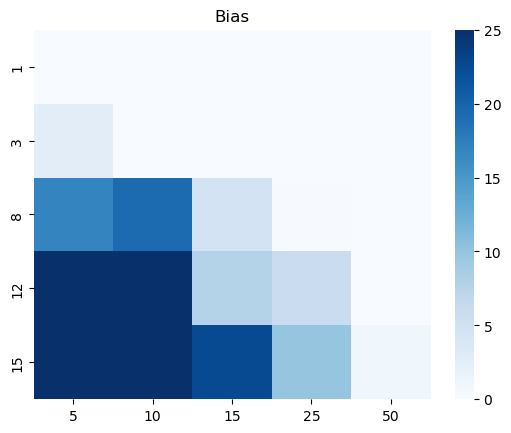

In [50]:
# Plot bias heatmap
# Write your code here
bias_matrix = np.zeros((5, 5))
variance_matrix = np.zeros((5, 5))

for i, size in enumerate(dataset_sizes):
    for j, degree in enumerate(degrees):
        bias, variance = bias_variance_estimation(degree, size)
        bias_matrix[j, i] = np.log(bias)
        variance_matrix[j, i] = np.log(variance)
        
ax = sns.heatmap(bias_matrix, vmin=0, vmax=25, xticklabels=dataset_sizes, yticklabels=degrees, cmap = "Blues")
ax.set_title('Bias')

Text(0.5, 1.0, 'Variance')

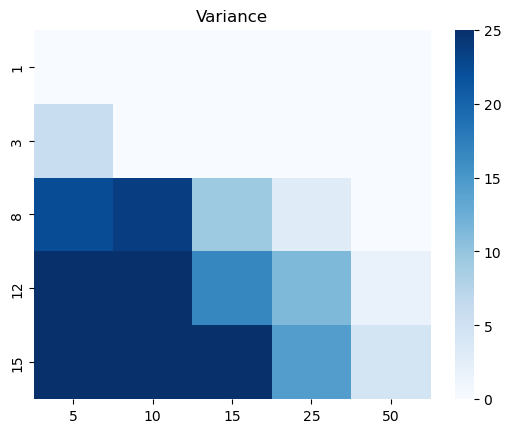

In [51]:
# Plot variance heatmap
# Write your code here
ax = sns.heatmap(variance_matrix, vmin=0, vmax=25, xticklabels=dataset_sizes, yticklabels=degrees, cmap = "Blues")
ax.set_title('Variance')

Fixing the `degree`, how does bias (or variance) change as the `n_train_samples` increase? Similarly, fixing the `n_train_samples`, how does bias (or variance) change as the `degree` increase? Assume that you have a large dataset. Do you prefer to use a "complex" model or a "simple" model? Why?

For a fixed degree, as the number of training samples increases, bias and variance decrease, because models with larger number of training samples tend to be more accurate and stable. 

For a fixed number of training samples, as we increase the degree of the polynomial of the model, variance will increase because of the overfitted model. Moreover, bias may reduce as the model becomes more complex, but after the model is overfitted, bias will increase.

I would definitely choose a complex model that contains a large number of training samples, because a simple model, after being provided with a sufficient number of samples, cannot efficiently exploit the samples and predict a good function. But a complex model would efficiently exploit all the data and develop a function with better performance on test data